In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [83]:
data = pd.read_csv(r"C:\Users\dkjai\Downloads\Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [84]:
data.shape

(13320, 9)

In [85]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [86]:
data1 = data.drop(['area_type','availability','society','balcony'],axis='columns')
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [87]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [88]:
data2 = data1.dropna()
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [89]:
data2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [90]:
data2['bhk'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\dkjai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
data2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [92]:
data2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [93]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [94]:
data2[~data2['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [95]:
def convert_sqft_tonum(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None
    
    

In [96]:
data3 = data2.copy()

In [97]:
data3['total_sqft'] = data3['total_sqft'].apply(convert_sqft_tonum)
data3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [98]:
data3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [99]:
data4 = data3.copy()
data4['price_per_sqft'] = data4['price']*100000/data4['total_sqft']

In [100]:
data4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [101]:
len(data4['location'].unique())

1304

In [102]:
data4.location = data4.location.apply(lambda x : x.strip())
location_stats=data['location'].value_counts().sort_values(ascending=False)

In [103]:
location_stats_less_than10 = location_stats[location_stats<10]
len(location_stats_less_than10)

1052

In [104]:
len(data4.location.unique())

1293

In [105]:
data4.location = data4.location.apply(lambda x : 'Other' if x in location_stats_less_than10 else x)
len(data4.location.unique())


283

In [106]:
data4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [107]:
data4.location.value_counts()

Other                        2716
Whitefield                    535
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                266
                             ... 
Banasawadi,                     1
ittamadu                        1
Panathur Road,                  1
Yemlur, Old Airport Road,       1
JP nagar 9th Phase,             1
Name: location, Length: 283, dtype: int64

In [108]:
# Assume 300 sqft for 1 bhk, so remove all the outliers not possible

In [109]:
data4[data4.total_sqft/data4.bhk<=300].value_counts()

location              size       total_sqft  bath  price  bhk  price_per_sqft
2nd Stage Nagarbhavi  5 Bedroom  1200.0      4.0   240.0  5    20000.000000      6
Other                 4 Bedroom  1200.0      5.0   325.0  4    27083.333333      6
                                             4.0   110.0  4    9166.666667       4
Electronic City       2 BHK      550.0       1.0   15.0   2    2727.272727       3
Nagarbhavi            5 Bedroom  1200.0      4.0   240.0  5    20000.000000      3
                                                                                ..
Other                 5 Bedroom  1200.0      5.0   85.0   5    7083.333333       1
                                             4.0   160.0  5    13333.333333      1
                                                   150.0  5    12500.000000      1
                                                   130.0  5    10833.333333      1
1st Block Jayanagar   6 BHK      1200.0      6.0   125.0  6    10416.666667      1
Length: 8

In [110]:
data5 = data4[~(data4.total_sqft/data4.bhk<=300)]
data5.shape

(12320, 7)

In [111]:
data5.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [112]:
# keep data points that comes btw mean-std and mean+std

In [113]:
def remove_outliers(df):
    
    df_res = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_res = pd.concat([df_res,reduced_df],ignore_index=True)
    return df_res



In [114]:
data6 = remove_outliers(data5)
data6.shape
    

(9971, 7)

In [115]:
data6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [116]:
def plot_scatter_plot(df,location):
    
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel('Price')
    plt.title('location')
    plt.legend()
    

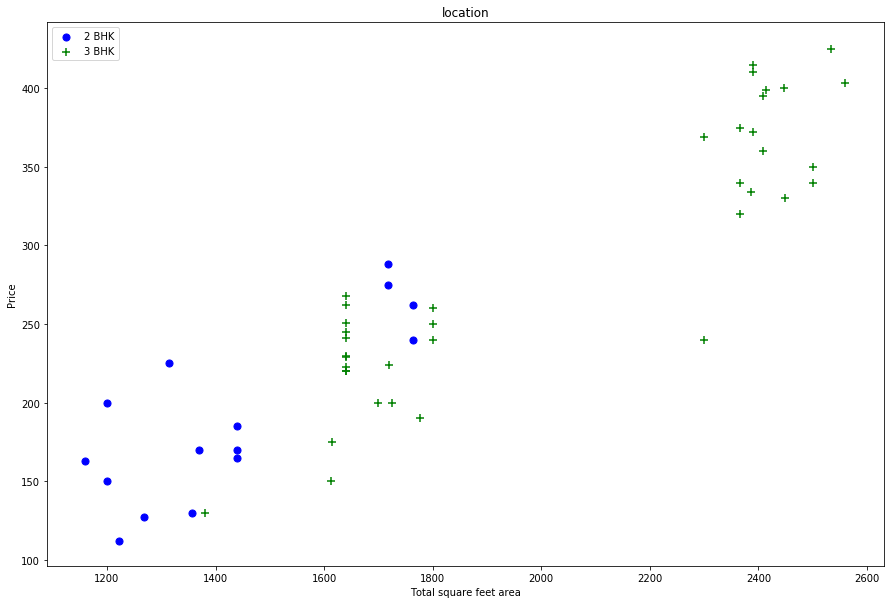

In [117]:
plot_scatter_plot(data6,'Rajaji Nagar')

In [118]:
# Remove the values for which the price of 2 bhk is less than 1 bhk
# remove price values where price of 2 bhk < mean of 1 bhk

In [123]:
def remove_bhk_outliers(df):
    
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            prev_stats = bhk_stats.get(bhk-1)
            if prev_stats and prev_stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(prev_stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
            

In [124]:
data7 = remove_bhk_outliers(data6)
data7.shape

(7186, 7)

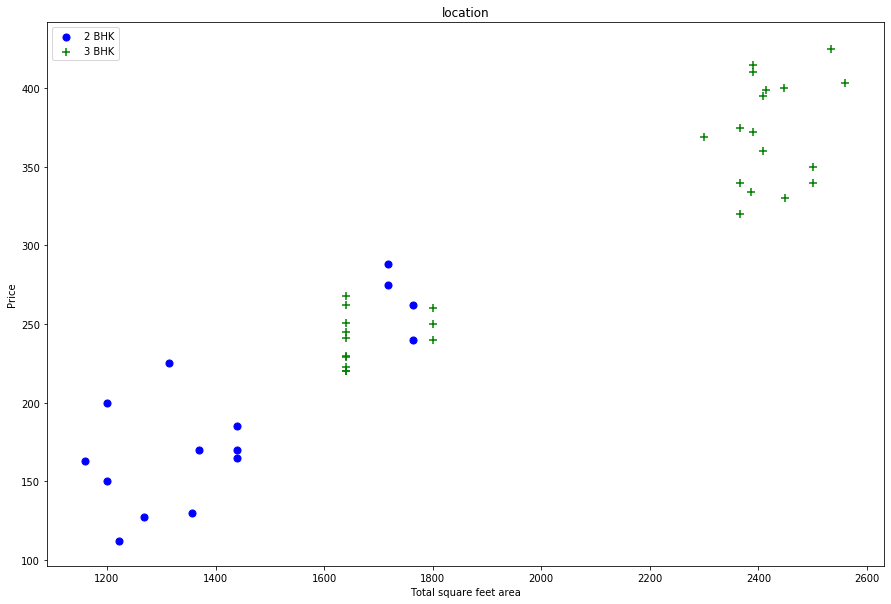

In [125]:
plot_scatter_plot(data7,'Rajaji Nagar')

Text(0, 0.5, 'Count')

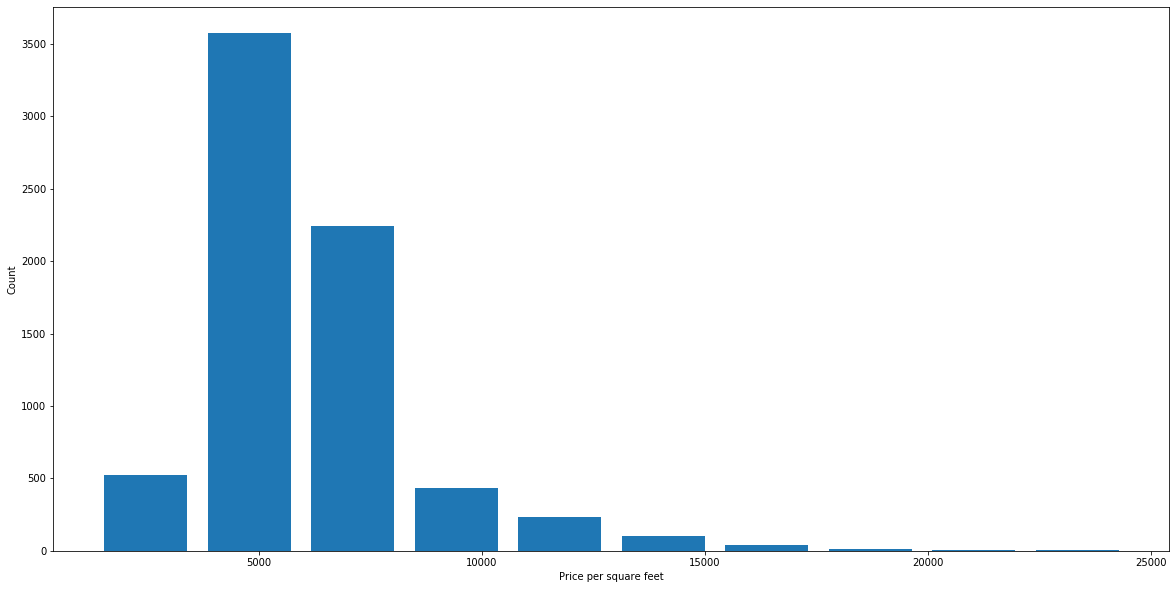

In [126]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [127]:
data7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [129]:
data7[data7.bath>data7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
564,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1582,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5164,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5751,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8757,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [130]:
data8 = data7[data7.bath<data7.bhk+2]
data8.shape

(7110, 7)

In [135]:
data9 = data8.drop(['size','price_per_sqft'],axis='columns')

In [136]:
data9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [137]:
# Convert location into dummies i.e number to be analysed by algorithm

In [138]:
dummies = pd.get_dummies(data9.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
data10 = pd.concat([data9,dummies.drop('Other',axis='columns')],axis='columns')

In [142]:
data10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
data11 = data10.drop('location',axis='columns')
data11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# Build the model

In [145]:
X = data11.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
y = data11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [148]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8527973545842963

In [150]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.80394422, 0.8411696 , 0.85155469, 0.86505218, 0.83018033])

In [155]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield', 'Whitefield,',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'south'],
      dtype='object', length=268)

In [156]:
np.where(X.columns=='1st Block Koramangala')[0][0]

4

In [153]:
def predict_price(location,sqft,bath,bhk):
    
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return model.predict([x])[0]
        

In [157]:
predict_price('1st Block Koramangala',1000,2,2)

129.33059281938864

In [159]:
predict_price('1st Block Koramangala',1000,2,3)

127.83203677288677

In [161]:
import pickle
with open('Bangalore_house_price_pred_model','wb') as f:
    pickle.dump(model,f)

In [162]:
import json

columns = {
    'data_columns':[col.lower() for col in X.columns]
}

with open("columns.json",'w') as f:
    f.write(json.dumps(columns))